# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys2 import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [4]:
cities[0]

'busselton'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [119]:
from datetime import datetime
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_number = 0
total_cities = len(cities)

# Loop through the list of cities and perform a request for data on each
print(f'Beginning Data Retrieval')
print(f'-----------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        city_name.append(city)        
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(datetime.fromtimestamp(response['dt']))
        city_number = city_number +1
        print(f"Processing Record {city_number} of {total_cities} | {city} ")
    except:
        print(f'City not found. Skipping...')
        
print(f'-----------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 616 | busselton 
Processing Record 2 of 616 | iracoubo 
Processing Record 3 of 616 | puerto ayora 
Processing Record 4 of 616 | tottori 
Processing Record 5 of 616 | east london 
Processing Record 6 of 616 | aasiaat 
Processing Record 7 of 616 | guasdualito 
Processing Record 8 of 616 | rikitea 
Processing Record 9 of 616 | warrnambool 
Processing Record 10 of 616 | bengkulu 
Processing Record 11 of 616 | saldanha 
Processing Record 12 of 616 | lucea 
Processing Record 13 of 616 | yovon 
Processing Record 14 of 616 | port elizabeth 
Processing Record 15 of 616 | arraial do cabo 
Processing Record 16 of 616 | taoudenni 
Processing Record 17 of 616 | saint-philippe 
Processing Record 18 of 616 | mar del plata 
Processing Record 19 of 616 | guerrero negro 
Processing Record 20 of 616 | vaini 
Processing Record 21 of 616 | victoria 
Processing Record 22 of 616 | oranjemund 
Processing Record 23 of 616 | coquimbo 

Processing Record 189 of 616 | sitka 
Processing Record 190 of 616 | narsaq 
City not found. Skipping...
Processing Record 191 of 616 | severnyy 
Processing Record 192 of 616 | manzhouli 
Processing Record 193 of 616 | ilulissat 
Processing Record 194 of 616 | poli 
Processing Record 195 of 616 | troitsko-pechorsk 
Processing Record 196 of 616 | kahului 
Processing Record 197 of 616 | zyryanskoye 
Processing Record 198 of 616 | matay 
City not found. Skipping...
Processing Record 199 of 616 | bambous virieux 
Processing Record 200 of 616 | mapimi 
City not found. Skipping...
Processing Record 201 of 616 | renqiu 
Processing Record 202 of 616 | gigmoto 
Processing Record 203 of 616 | iqaluit 
Processing Record 204 of 616 | clyde river 
City not found. Skipping...
Processing Record 205 of 616 | balikpapan 
Processing Record 206 of 616 | japura 
Processing Record 207 of 616 | iwanai 
Processing Record 208 of 616 | ankazobe 
City not found. Skipping...
City not found. Skipping...
Processin

Processing Record 376 of 616 | cayenne 
Processing Record 377 of 616 | mandurah 
Processing Record 378 of 616 | sinnamary 
Processing Record 379 of 616 | evensk 
Processing Record 380 of 616 | abu samrah 
Processing Record 381 of 616 | hami 
Processing Record 382 of 616 | necochea 
Processing Record 383 of 616 | tessalit 
Processing Record 384 of 616 | senneterre 
Processing Record 385 of 616 | la motte-servolex 
Processing Record 386 of 616 | quang ngai 
Processing Record 387 of 616 | buala 
City not found. Skipping...
Processing Record 388 of 616 | bowen 
Processing Record 389 of 616 | semnan 
Processing Record 390 of 616 | egvekinot 
Processing Record 391 of 616 | safaga 
Processing Record 392 of 616 | tautira 
Processing Record 393 of 616 | margate 
Processing Record 394 of 616 | noumea 
Processing Record 395 of 616 | lashio 
Processing Record 396 of 616 | tirumullaivasal 
Processing Record 397 of 616 | chateau-gontier 
City not found. Skipping...
Processing Record 398 of 616 | ber

City not found. Skipping...
Processing Record 567 of 616 | kenai 
-----------------------------
Data Retrieval Complete
-----------------------------


In [120]:
print(len(city_name))
print(len (lat))

567
567


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [121]:
weather_dataf = pd.DataFrame({'City':city_name,
                             'Lat' :lat,
                             'Lng' :lng,
                             'Max Temp':max_temp,
                             'Humidity':humidity,
                             'Cloudiness':cloudiness,
                             'Wind Speed':wind_speed,
                             'Country':country,
                             'Date':date
                            })
weather_dataf.to_csv('citiesdata.csv',index=False)
weather_dataf.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,62.01,73,92,1.99,AU,2021-04-30 01:38:26
1,iracoubo,5.4802,-53.2011,76.28,87,100,7.11,GF,2021-04-30 01:38:26
2,puerto ayora,-0.7393,-90.3518,74.68,84,85,7.25,EC,2021-04-30 01:38:26
3,tottori,35.5000,134.2333,64.40,59,75,5.75,JP,2021-04-30 01:38:27
4,east london,-33.0153,27.9116,59.00,94,20,9.22,ZA,2021-04-30 01:38:27


In [57]:
sta_weather_dataf = pd.DataFrame(weather_dataf.describe())
#sta_weather_dataf = sta_weather_dataf.round(2)
sta_weather_dataf

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.798982,19.004484,62.119489,70.148148,53.049383,7.284903,1.619756e+09
std,33.410913,89.848492,18.588806,22.658065,38.555147,5.378802,1.383409e+02
min,-54.800000,-179.166700,12.020000,8.000000,0.000000,0.580000,1.619756e+09
25%,-8.262050,-56.354000,48.200000,58.000000,14.000000,3.580000,1.619756e+09
50%,23.368700,20.066700,65.250000,76.000000,60.000000,6.200000,1.619757e+09
75%,46.895800,99.008700,77.000000,88.000000,90.000000,9.360000,1.619757e+09
max,78.218600,179.316700,100.020000,100.000000,100.000000,77.110000,1.619757e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [60]:
weather_dataf['Humidity'].max()

100

In [63]:
#  Get the indices of cities that have humidity over 100%.
print(f'There are no cities that have humidity > 100%')

There are no cities that have humidity > 100%


In [62]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f'There are no cities that have humidity > 100%')

There are no cities that have humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

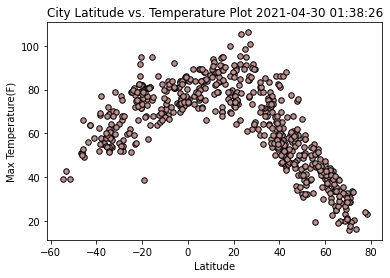

In [138]:
# create a data frame from cities, lat, and temp
datep = weather_dataf['Date'][0]
weather_lattemp = pd.DataFrame(weather_dataf[['City','Lat','Max Temp']])
weather_lattemp
# Create a Scatter Plot for Latitude vs. Temperature
x_values = weather_lattemp['Lat']
y_values = weather_lattemp['Max Temp']
plt.title(f'City Latitude vs. Temperature Plot {datep}')
plt.scatter(x_values,y_values,c="rosybrown", s=30,marker="o",edgecolors='black');
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
# Save the figure
plt.savefig('Latitudevs.Temperature.png')
plt.show()

What is interesting in this plot is the fact that between the range of latitude 0 and 20, it can be observed the highest temperatures, and if the latitude is far from this range in positive or negative, the temperature tends to decrease.

## Latitude vs. Humidity Plot

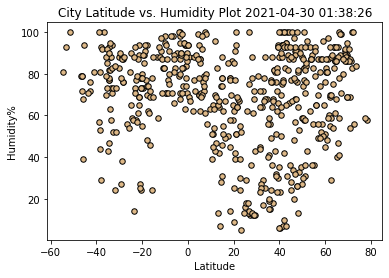

In [139]:
# create a data frame from cities, lat, and hum
weather_lathum = pd.DataFrame(weather_dataf[['City','Lat','Humidity']])
weather_lathum
# Create a Scatter Plot for Latitude vs. Temperature
x_values = weather_lathum['Lat']
y_values = weather_lathum['Humidity']
plt.title(f'City Latitude vs. Humidity Plot {datep}')
plt.scatter(x_values,y_values,c="burlywood", s=30,marker="o",edgecolors='black');
plt.xlabel('Latitude')
plt.ylabel('Humidity%')
# Save the figure
plt.savefig('Latitudevs.Humidity.png')
plt.show()

The graph shows that there is not humidity if the latitude is near from 0.

## Latitude vs. Cloudiness Plot

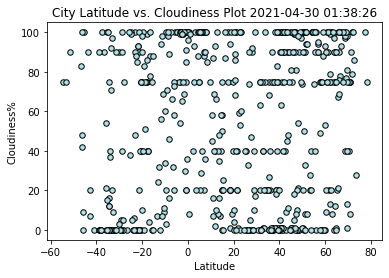

In [140]:
weather_latcl = pd.DataFrame(weather_dataf[['City','Lat','Cloudiness']])
weather_latcl
# Create a Scatter Plot for Latitude vs. Temperature
x_values = weather_latcl['Lat']
y_values = weather_latcl['Cloudiness']
plt.title(f'City Latitude vs. Cloudiness Plot {datep}')
plt.scatter(x_values,y_values,c="powderblue", s=30,marker="o",edgecolors='black');
plt.xlabel('Latitude')
plt.ylabel('Cloudiness%')
# Save the figure
plt.savefig('Latitudevs.Cloudiness.png')
plt.show()

The graph shows that there is less cloudiness in the latitude lesser than -60, equal to 0 or greater than 80.

## Latitude vs. Wind Speed Plot

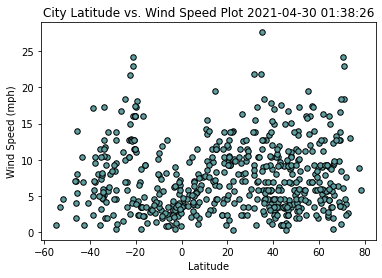

In [141]:
weather_latws = pd.DataFrame(weather_dataf[['City','Lat','Wind Speed']])
weather_latws
# Create a Scatter Plot for Latitude vs. Temperature
x_values = weather_latws['Lat']
y_values = weather_latws['Wind Speed']
plt.title(f'City Latitude vs. Wind Speed Plot {datep}')
plt.scatter(x_values,y_values,c="cadetblue", s=30,marker="o",edgecolors='black');
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
# Save the figure
plt.savefig('Latitudevs.WindSpeed.png')
plt.show()

The graph shows that there is less wind speed in the latitudes near to 0.

## Linear Regression

In [147]:
#Northern Hemisphere
northern_hph = weather_dataf[weather_dataf['Lat'] >= 0]
#Southern Hemisphere
southern_hph = weather_dataf[weather_dataf['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7612930998279573


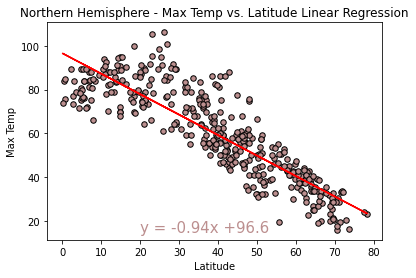

In [173]:
# Perform a linear regression on temperature vs. latitude
x_values = northern_hph['Lat']
y_values = northern_hph['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create Plot
plt.scatter(x_values,y_values,c="rosybrown", s=30,marker="o",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,15),fontsize=15,color="rosybrown")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Save the figure
plt.savefig('NMaxTempvs.LatitudeLR.png')
# Show plot
plt.show()

What can be clearly seen in this graph is a negative correlation between  the Max Temp versus the Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46619591319247833


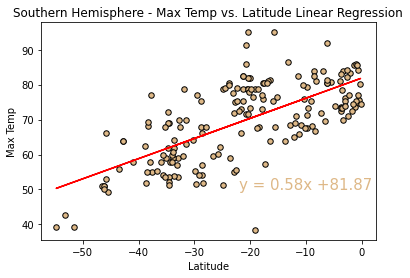

In [174]:
# Perform a linear regression on temperature vs. latitude
x_values = southern_hph['Lat']
y_values = southern_hph['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create Plot
plt.scatter(x_values,y_values,c="burlywood", s=30,marker="o",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-22,50),fontsize=15,color="burlywood")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Save the figure
plt.savefig('SMaxTempvs.LatitudeLR.png')
# Show plot
plt.show()

What can be clearly seen in this graph is a positive correlation between the Max Temp versus the Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03373359045664982


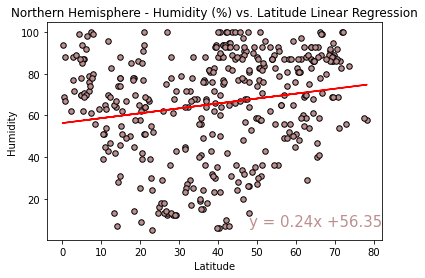

In [194]:
# Perform a linear regression on temperature vs. latitude
x_values = northern_hph['Lat']
y_values = northern_hph['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create Plot
plt.scatter(x_values,y_values,c="rosybrown", s=30,marker="o",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(48,7),fontsize=15,color="rosybrown")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Save the figure
plt.savefig('NHumidityvs.LatitudeLR.png')
# Show plot
plt.show()

What can be clearly seen in this graph is that there is not a strong correlation between Humidity (%) vs. Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03871540161179929


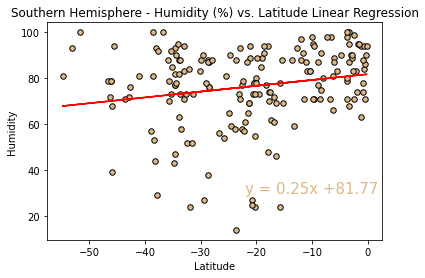

In [197]:
# Perform a linear regression on temperature vs. latitude
x_values = southern_hph['Lat']
y_values = southern_hph['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create Plot
plt.scatter(x_values,y_values,c="burlywood", s=30,marker="o",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-22,30),fontsize=15,color="burlywood")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Save the figure
plt.savefig('SHumidityvs.LatitudeLR.png')
# Show plot
plt.show()

What can be clearly seen in this graph is that there is not a strong correlation between Humidity (%) vs. Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.009472488436571495


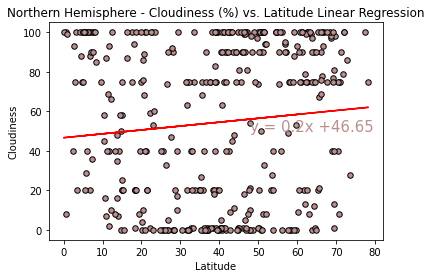

In [199]:
# Perform a linear regression on temperature vs. latitude
x_values = northern_hph['Lat']
y_values = northern_hph['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create Plot
plt.scatter(x_values,y_values,c="rosybrown", s=30,marker="o",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(48,50),fontsize=15,color="rosybrown")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Save the figure
plt.savefig('NCloudinessvs.LatitudeLR.png')
# Show plot
plt.show()

What can be clearly seen in this graph is that there is not correlation between Cloudiness (%) vs. Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10470036063454348


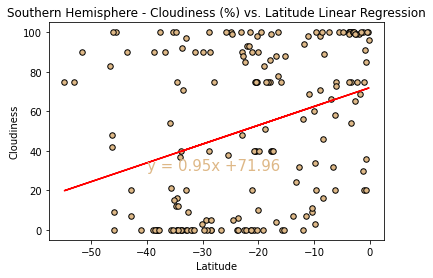

In [221]:
# Perform a linear regression on temperature vs. latitude
x_values = southern_hph['Lat']
y_values = southern_hph['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create Plot
plt.scatter(x_values,y_values,c="burlywood", s=30,marker="o",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-40,30),fontsize=15,color="burlywood")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Save the figure
plt.savefig('SCloudinessvs.LatitudeLR.png')
# Show plot
plt.show()

What can be clearly seen in this graph is that there is a very low correlation between Cloudiness (%) vs. Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005426353215226972


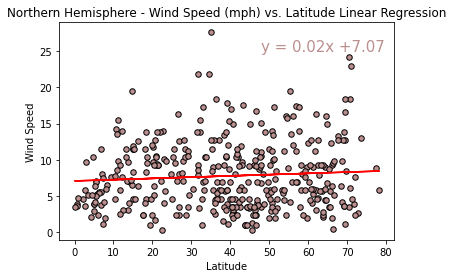

In [204]:
# Perform a linear regression on temperature vs. latitude
x_values = northern_hph['Lat']
y_values = northern_hph['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create Plot
plt.scatter(x_values,y_values,c="rosybrown", s=30,marker="o",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(48,25),fontsize=15,color="rosybrown")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Save the figure
plt.savefig('NWindSpeedvs.LatitudeLR.png')
# Show plot
plt.show()

What can be clearly seen in this graph is that there is not correlation between Wind Speed (%) vs. Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [1]:
# Perform a linear regression on temperature vs. latitude
x_values = southern_hph['Lat']
y_values = southern_hph['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create Plot
plt.scatter(x_values,y_values,c="burlywood", s=30,marker="o",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-22,20),fontsize=15,color="burlywood")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Save the figure
plt.savefig('SWindSpeedvs.LatitudeLR.png')
# Show plot
plt.show()

NameError: name 'southern_hph' is not defined

What can be clearly seen in this graph is that there is not correlation between Wind Speed (%) vs. Latitude in the Southern Hemisphere.